# Storytelling Data Visualization on Exchange Rates

***
This is a guided project under Dataquest's curriculum. 
***

The goal of this project is to practice storytelling through data visualization. We will use datly exchange rates per euro (€) data set to see the movements and prepare a graph to tell a story associated. Some currency in the data set doesn't exist anymore as it changed to Euro (€). Bulgarian lev is pegged to Euro since 2002.

The data is downloaded from <a href="https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020">Kaggle</a>.

## Explore data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

In [2]:
exchange_rates = pd.read_csv("D:\Documents\Python Journey\Dataquest\Guided Project 5_Storytelling Data Visualization on Exchange Rates\euro-daily-hist_1999_2020.csv")

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5754 non-null   object 
 1   [Australian dollar ]      5754 non-null   object 
 2   [Bulgarian lev ]          5352 non-null   object 
 3   [Brazilian real ]         5486 non-null   object 
 4   [Canadian dollar ]        5754 non-null   object 
 5   [Swiss franc ]            5754 non-null   object 
 6   [Chinese yuan renminbi ]  5486 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5754 non-null   object 
 9   [Danish krone ]           5754 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5754 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5754 non-null   object 
 14  [Croatia

In [3]:
print(exchange_rates.head(5))
print(exchange_rates.tail(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-03-26               1.5459           1.9558            6.7110   
1   2021-03-25               1.5548           1.9558            6.6960   
2   2021-03-24               1.5532           1.9558            6.5258   
3   2021-03-23               1.5491           1.9558            6.5562   
4   2021-03-22               1.5400           1.9558            6.5917   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.4814         1.1090                   7.7063              NaN   
1             1.4849         1.1045                   7.7220              NaN   
2             1.4884         1.1068                   7.7133              NaN   
3             1.4938         1.1066                   7.7367              NaN   
4             1.4903         1.1023                   7.7582              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

There are 5,754 rows and 41 columns in our data set. Note that there are many columns that contain null values. Some currency contains null values as they were replaced by another currency. For example, Cypriot pound, Estonian kroon, and Greek drachma were replaced by Euro (€). The earlier it was replaced, the more null values there are.

The exchange rates in this data set, although they are numbers, are stored in a string format, except 3 columns (i.e. Iceland krona, Romanian leu, and Turkish lira) which are stored as float.

The header of the columns are in \[*column name*\] format. Before we create our visualization, we will clean the data first so they are easier to work with.

## Clean data
To clean the data set, the following steps are performed:

- Rename \[*column name*\] to snakecase and remove \[\]
- Rename `Period\Unit:` to `date` and convert to datetime data type
- Rearrange the `date` to be in ascending order
- Convert the exchange rates to float data type

In [4]:
# Create header map for currency
old_header = list(exchange_rates.columns)
old_header = old_header[1:]

new_header = []
for cur in old_header:
    cur = cur.replace("[", "")
    cur = cur.replace("]", "")
    cur = cur.strip()
    cur = cur.replace(" ", "_")
    new_header.append(cur)

header_map = {}
for old, new in zip(old_header, new_header):
    header_map[old] = new

header_map 

{'[Australian dollar ]': 'Australian_dollar',
 '[Bulgarian lev ]': 'Bulgarian_lev',
 '[Brazilian real ]': 'Brazilian_real',
 '[Canadian dollar ]': 'Canadian_dollar',
 '[Swiss franc ]': 'Swiss_franc',
 '[Chinese yuan renminbi ]': 'Chinese_yuan_renminbi',
 '[Cypriot pound ]': 'Cypriot_pound',
 '[Czech koruna ]': 'Czech_koruna',
 '[Danish krone ]': 'Danish_krone',
 '[Estonian kroon ]': 'Estonian_kroon',
 '[UK pound sterling ]': 'UK_pound_sterling',
 '[Greek drachma ]': 'Greek_drachma',
 '[Hong Kong dollar ]': 'Hong_Kong_dollar',
 '[Croatian kuna ]': 'Croatian_kuna',
 '[Hungarian forint ]': 'Hungarian_forint',
 '[Indonesian rupiah ]': 'Indonesian_rupiah',
 '[Israeli shekel ]': 'Israeli_shekel',
 '[Indian rupee ]': 'Indian_rupee',
 '[Iceland krona ]': 'Iceland_krona',
 '[Japanese yen ]': 'Japanese_yen',
 '[Korean won ]': 'Korean_won',
 '[Lithuanian litas ]': 'Lithuanian_litas',
 '[Latvian lats ]': 'Latvian_lats',
 '[Maltese lira ]': 'Maltese_lira',
 '[Mexican peso ]': 'Mexican_peso',
 '[Mal

In [5]:
# Rename [column name] to snakecase and remove []
exchange_rates.rename(columns=header_map, inplace=True)

# Rename Period\Unit: to Date and convert to datetime format
exchange_rates.rename(columns={"Period\\Unit:": "date"}, inplace=True)
exchange_rates["date"] = pd.to_datetime(exchange_rates["date"])

# Rearrange the date column to be in ascending order
exchange_rates.sort_values("date", ignore_index=True, inplace=True)

exchange_rates.head()

,date,Australian_dollar,Bulgarian_lev,Brazilian_real,Canadian_dollar,Swiss_franc,Chinese_yuan_renminbi,Cypriot_pound,Czech_koruna,Danish_krone,...,Romanian_leu,Russian_rouble,Swedish_krona,Singapore_dollar,Slovenian_tolar,Slovak_koruna,Thai_baht,Turkish_lira,US_dollar,South_African_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Now that headers are cleaned, we will convert the exchange rates to float data type. First, we will check data in the columns.

In [6]:
exchange_rates["US_dollar"].value_counts().sort_index(ascending=True)

-         62
0.8252     1
0.8307     1
0.8324     1
0.8377     1
          ..
1.5919     1
1.5928     1
1.5931     1
1.5940     1
1.5990     1
Name: US_dollar, Length: 3543, dtype: int64

In [7]:
exchange_rates["Mexican_peso"].value_counts().sort_index(ascending=True)

-          62
10.0010     1
10.0072     1
10.0074     1
10.0095     1
           ..
9.9897      1
9.9917      1
9.9929      1
9.9939      1
9.9971      1
Name: Mexican_peso, Length: 5563, dtype: int64

In [8]:
exchange_rates["Thai_baht"].value_counts().sort_index(ascending=True)

-          62
33.2040     1
33.2180     1
33.2630     1
33.2720     1
           ..
53.1990     1
53.2170     1
53.3020     1
53.3250     1
53.5360     1
Name: Thai_baht, Length: 5121, dtype: int64

From our 3 sample columns, we notice that there are not only numbers but also a hyphen (-) in the columns. We will change these hyphens to null values, then convert to float type.

In [9]:
for currency in list(exchange_rates.columns):
    if currency != "date":
        exchange_rates.loc[exchange_rates[str(currency)] == "-", str(currency)] = np.nan

In [10]:
header_type = {}

for name in new_header:
    header_type[name] = "float64"  

exchange_rates = exchange_rates.astype(header_type)
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   5754 non-null   datetime64[ns]
 1   Australian_dollar      5692 non-null   float64       
 2   Bulgarian_lev          5294 non-null   float64       
 3   Brazilian_real         5425 non-null   float64       
 4   Canadian_dollar        5692 non-null   float64       
 5   Swiss_franc            5692 non-null   float64       
 6   Chinese_yuan_renminbi  5425 non-null   float64       
 7   Cypriot_pound          2304 non-null   float64       
 8   Czech_koruna           5692 non-null   float64       
 9   Danish_krone           5692 non-null   float64       
 10  Estonian_kroon         3074 non-null   float64       
 11  UK_pound_sterling      5692 non-null   float64       
 12  Greek_drachma          514 non-null    float64       
 13  Hon

## Visualize data
In this part, we will focus on the exchange rates between euro and Thai baht. The goal of this project is to tell a story using data visualization. Below is a list of story ideas:

1. EUR/THB exchange rate movements during the 2006 coup
2. EUR/THB exchange rate movements during the 2014 coup
3. EUR/THB exchange rate movements during SARS outbreak

To focus on long-term trends, we will be using rolling means with a rolling window of 30 days in our visualization.

In [11]:
eur_to_thb = exchange_rates[["date","Thai_baht"]].copy()
eur_to_thb = eur_to_thb.dropna()
eur_to_thb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 0 to 5753
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5692 non-null   datetime64[ns]
 1   Thai_baht  5692 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 133.4 KB


In [12]:
eur_to_thb["rolling_mean"] = eur_to_thb["Thai_baht"].rolling(30).mean()
eur_to_thb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 0 to 5753
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5692 non-null   datetime64[ns]
 1   Thai_baht     5692 non-null   float64       
 2   rolling_mean  5663 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 177.9 KB


### EUR/THB exchange rate movements during the 2006 coup
The coup d'état in 2006 occurred on 19 September 2006, during the government of Prime Minister Thaksin Shinawatra. This is a result of an unrest led by Sondhi Limthongkul, and is the first coup in a 15-year period in Thailand.

In [13]:
# data set for 2006 coup

coup_03_08 = eur_to_thb.copy()[(eur_to_thb["date"].dt.year >= 2003) & (eur_to_thb["date"].dt.year <= 2008)]
coup_05_07 = eur_to_thb.copy()[(eur_to_thb["date"].dt.year >= 2005) & (eur_to_thb["date"].dt.year <= 2007)]

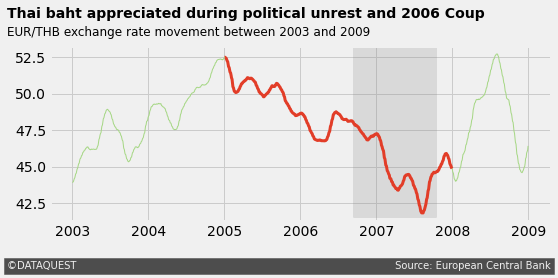

In [14]:
# using the FiveThirtyEight style
style.use("fivethirtyeight")

# adding the plot
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(coup_03_08["date"],
        coup_03_08["rolling_mean"],
        linewidth=1,
        color="#A6D785")

# highlighting the political unrest period
ax.plot(coup_05_07["date"],
        coup_05_07["rolling_mean"],
        linewidth=3,
        color="#e23d28")

# highlighting the coup period
ax.axvspan(xmin=13400, xmax=13800, ymin=0.02, alpha=0.2, color="grey")

# addiing title and subtitle
ax.text(11740, 55.2, "Thai baht appreciated during political unrest and 2006 Coup", weight="bold")
ax.text(11740, 54, "EUR/THB exchange rate movement between 2003 and 2009", size=12)

# adding a signature
ax.text(11740, 38, "©DATAQUEST" + " "*102 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", size=10)

plt.show()

### EUR/THB exchange rate movements during the 2014 coup
The coup d'état in 2014 occurred on 22 May 2014, during the government of Prime Minister Yingluck Shinawatra. This is a result of an unrest led by Suthep Thaugsuban. The unrest began in November 2013.

In [15]:
# data set for 2014 coup

coup_11_21 = eur_to_thb.copy()[(eur_to_thb["date"].dt.year >= 2011) & (eur_to_thb["date"].dt.year <= 2021)]
coup_14_19 = eur_to_thb.copy()[(eur_to_thb["date"].dt.year >= 2014) & (eur_to_thb["date"].dt.year <= 2019)]

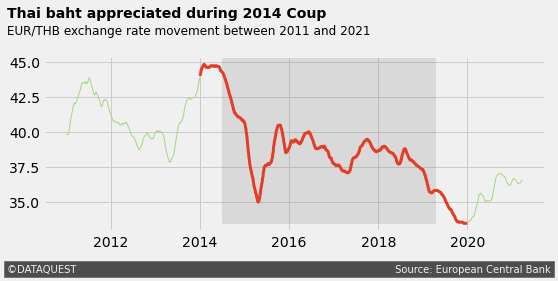

In [16]:
# adding the plot
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(coup_11_21["date"],
        coup_11_21["rolling_mean"],
        linewidth=1,
        color="#A6D785")

# highlighting the political unrest period
ax.plot(coup_14_19["date"],
        coup_14_19["rolling_mean"],
        linewidth=3,
        color="#e23d28")

# highlighting the coup period
ax.axvspan(xmin=16250, xmax=18000, ymin=0.05, alpha=0.2, color="grey")

# addiing title and subtitle
ax.text(14490, 48.2, "Thai baht appreciated during 2014 Coup", weight="bold")
ax.text(14490, 47, "EUR/THB exchange rate movement between 2011 and 2021", size=12)

# adding a signature
ax.text(14490, 30, "©DATAQUEST" + " "*102 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", size=10)

plt.show()

### EUR/THB exchange rate movements during SARS outbreak
The SARS outbreak started in late 2002 and was first identitied in China. The outbreak mainly affected Asia and lasted around 8 months. Here we will compare how the outbreak affected exchange rates between EUR/CNY and EUR/THB.

In [17]:
eur_to_thbcny = exchange_rates[["date","Thai_baht","Chinese_yuan_renminbi"]].copy()
eur_to_thbcny = eur_to_thbcny.dropna()
eur_to_thbcny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5425 entries, 268 to 5753
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   5425 non-null   datetime64[ns]
 1   Thai_baht              5425 non-null   float64       
 2   Chinese_yuan_renminbi  5425 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 169.5 KB


In [18]:
eur_to_thbcny["rolling_mean_thb"] = eur_to_thbcny["Thai_baht"].rolling(30).mean()
eur_to_thbcny["rolling_mean_cny"] = eur_to_thbcny["Chinese_yuan_renminbi"].rolling(30).mean()
eur_to_thbcny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5425 entries, 268 to 5753
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   5425 non-null   datetime64[ns]
 1   Thai_baht              5425 non-null   float64       
 2   Chinese_yuan_renminbi  5425 non-null   float64       
 3   rolling_mean_thb       5396 non-null   float64       
 4   rolling_mean_cny       5396 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 254.3 KB


In [19]:
# data set for SARS

sars_all = eur_to_thbcny.copy()[(eur_to_thbcny["date"].dt.year >= 2000) & (eur_to_thbcny["date"].dt.year <= 2005)]
sars = eur_to_thbcny.copy()[(eur_to_thbcny["date"].dt.year >= 2002) & (eur_to_thbcny["date"].dt.year <= 2003)]

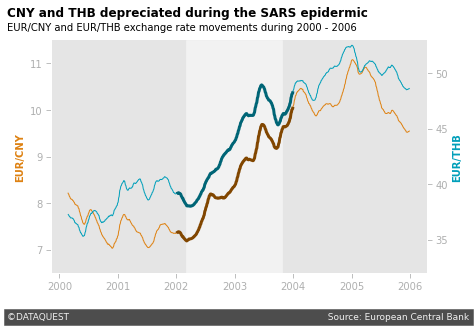

In [20]:
style.use("ggplot")

# adding the plots
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(sars_all["date"],
        sars_all["rolling_mean_cny"],
        linewidth=1,
        color="#DE8213")

# highlighting the SARS outbreak period
ax.plot(sars["date"], sars["rolling_mean_cny"],
        linewidth=3,
        color="#814600")

ax.grid(b=False)
ax.set_ylabel("EUR/CNY", size=10, color="#DE8213", weight="bold")
ax.set_ylim(6.5, 11.5)
ax.set_yticks([7, 8, 9, 10, 11])
ax.tick_params(axis="both", labelsize=10, length=5, color="#AEAFAF", grid_alpha=0.2, colors="#AEAFAF")
ax.spines["top"].set_visible(False)

# adding the 2nd y-axis
ax2 = ax.twinx()
ax2.plot(sars_all["date"],
        sars_all["rolling_mean_thb"],
        linewidth=1,
        color="#009FBA")

# highlighting the SARS outbreak period
ax2.plot(sars["date"], sars["rolling_mean_thb"],
        linewidth=3,
        color="#006576")

ax2.grid(b=False)
ax2.set_ylabel("EUR/THB", size=10, color="#009FBA", weight="bold")
ax2.set_ylim(32, 53)
ax2.set_yticks([35, 40, 45, 50])
ax2.tick_params(axis="both", labelsize=10, length=5, color="#AEAFAF", grid_alpha=0.2, colors="#AEAFAF")
ax2.spines["top"].set_visible(False)

# highlighting the SARS outbreak period

ax.axvspan(xmin=11750, xmax=12350, ymin=00, alpha=0.5, color="white")

# adding title and subtitle
ax.text(10630, 12, "CNY and THB depreciated during the SARS epidermic", weight="bold", size=12)
ax.text(10630, 11.7, "EUR/CNY and EUR/THB exchange rate movements during 2000 - 2006", size=10)

# adding a signature
ax.text(10630, 5.5, "©DATAQUEST" + " "*90 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", size=9)

plt.show()